In [91]:
import pandas as pd 
import matplotlib.pyplot as plt

In [92]:
data = pd.read_csv('data.csv')

In [93]:
data = data[['popularity', 'acousticness', 'duration_ms', 'instrumentalness','liveness', 'speechiness', 'year']]

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        174389 non-null  int64  
 1   acousticness      174389 non-null  float64
 2   duration_ms       174389 non-null  int64  
 3   instrumentalness  174389 non-null  float64
 4   liveness          174389 non-null  float64
 5   speechiness       174389 non-null  float64
 6   year              174389 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 9.3 MB


In [95]:
data.drop_duplicates()

,popularity,acousticness,duration_ms,instrumentalness,liveness,speechiness,year
0,12,0.991000,168333,0.000522,0.3790,0.0936,1920
1,7,0.643000,150200,0.026400,0.0809,0.0534,1920
2,4,0.993000,163827,0.000018,0.5190,0.1740,1920
3,17,0.000173,422087,0.801000,0.1280,0.0425,1920
4,2,0.295000,165224,0.000246,0.4020,0.0768,1920
...,...,...,...,...,...,...,...
174369,0,0.995000,349200,0.908000,0.0995,0.0564,2021
174371,0,0.995000,206700,0.878000,0.0774,0.0455,2021
174375,0,0.988000,303333,0.879000,0.1200,0.0515,2021
174377,0,0.795000,144720,0.000000,0.1960,0.0360,2021


In [96]:
data = data.groupby('year').mean()
data.head()

,popularity,acousticness,duration_ms,instrumentalness,liveness,speechiness
year,,,,,,
1920,0.610315,0.631242,238092.997135,0.354219,0.216049,0.082984
1921,0.391026,0.862105,257891.762821,0.337158,0.205219,0.078952
1922,0.090909,0.828934,140135.140496,0.254776,0.256662,0.464368
1923,5.205405,0.957247,177942.362162,0.371733,0.227462,0.093949
1924,0.661017,0.940200,191046.707627,0.581701,0.235219,0.092089


In [97]:
def differences(data, lag):
    diff = [0]
    diff += [data.iloc[i] - data.iloc[i - lag] for i in range(lag, len(data))]
    return pd.Series(diff)

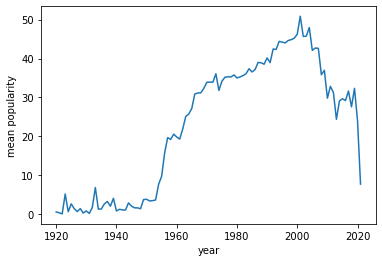

In [98]:
plt.plot(data['popularity'])
plt.xlabel('year')
plt.ylabel('mean popularity')
plt.savefig('popularity.png')

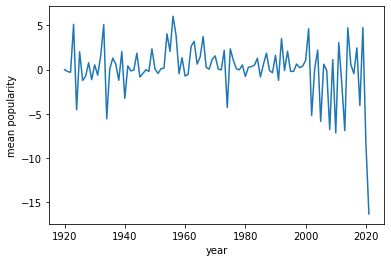

In [99]:
data['popularity'] = differences(data['popularity'], 1).values
plt.plot(data['popularity'])
plt.xlabel('year')
plt.ylabel('mean popularity')
plt.savefig('popularity.png')

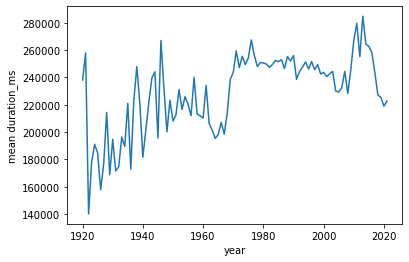

In [100]:
plt.plot(data['duration_ms'])
plt.xlabel('year')
plt.ylabel('mean duration_ms')
plt.savefig('duration_ms.png')

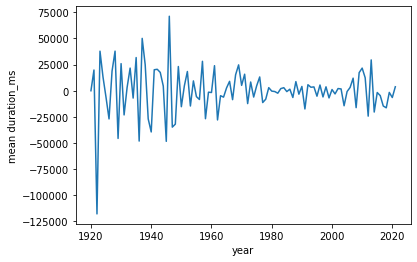

In [101]:
data['duration_ms'] = differences(data['duration_ms'], 1).values
plt.plot(data['duration_ms'])
plt.xlabel('year')
plt.ylabel('mean duration_ms')
plt.savefig('duration_ms.png')

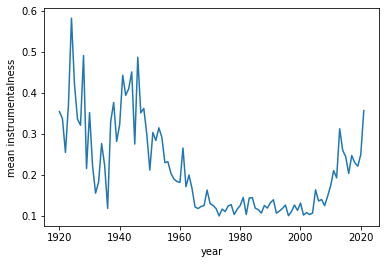

In [102]:
plt.plot(data['instrumentalness'])
plt.xlabel('year')
plt.ylabel('mean instrumentalness')
plt.savefig('instrumentalness.png')

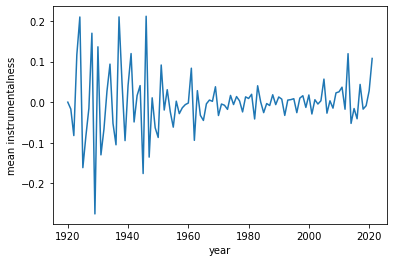

In [103]:
data['instrumentalness'] = differences(data['instrumentalness'], 1).values
plt.plot(data['instrumentalness'])
plt.xlabel('year')
plt.ylabel('mean instrumentalness')
plt.savefig('instrumentalness.png')

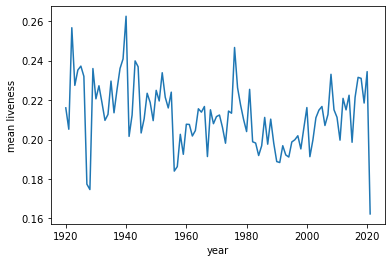

In [104]:
plt.plot(data['liveness'])
plt.xlabel('year')
plt.ylabel('mean liveness')
plt.savefig('liveness.png')

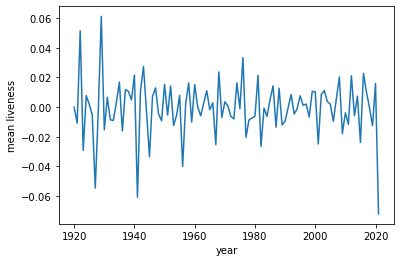

In [105]:
data['liveness'] = differences(data['liveness'], 1).values
plt.plot(data['liveness'])
plt.xlabel('year')
plt.ylabel('mean liveness')
plt.savefig('liveness.png')

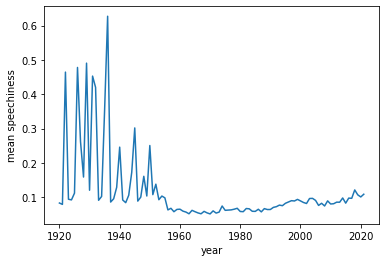

In [106]:
plt.plot(data['speechiness'])
plt.xlabel('year')
plt.ylabel('mean speechiness')
plt.savefig('speechiness.png')

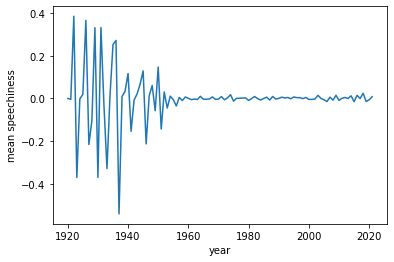

In [107]:
data['speechiness'] = differences(data['speechiness'], 1).values
plt.plot(data['speechiness'])
plt.xlabel('year')
plt.ylabel('mean speechiness')
plt.savefig('speechiness.png')

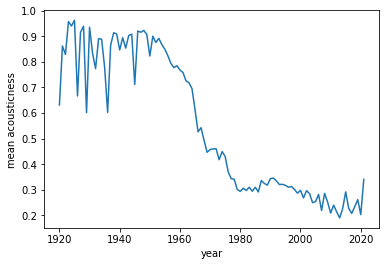

In [108]:
plt.plot(data['acousticness'])
plt.xlabel('year')
plt.ylabel('mean acousticness')
plt.savefig('acousticness.png')

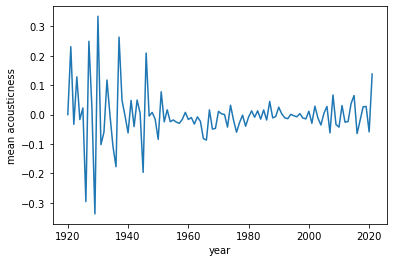

In [109]:
data['acousticness'] = differences(data['acousticness'], 1).values
plt.plot(data['acousticness'])
plt.xlabel('year')
plt.ylabel('mean acousticness')
plt.savefig('acousticness.png')

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [111]:
import statsmodels.tsa.api as smt

result = smt.stattools.adfuller(data['popularity'])
print('Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))

Augmented Dickey-Fuller test:
Statistic value = -1.035312
p-value = 0.740168


In [112]:
result = smt.stattools.adfuller(data['acousticness'])
print('Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))

Augmented Dickey-Fuller test:
Statistic value = -1.562433
p-value = 0.502432


In [113]:
result = smt.stattools.adfuller(data['duration_ms'])
print('Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))

Augmented Dickey-Fuller test:
Statistic value = -4.485794
p-value = 0.000209


In [114]:
result = smt.stattools.adfuller(data['instrumentalness'])
print('Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))

Augmented Dickey-Fuller test:
Statistic value = -11.157221
p-value = 0.000000


In [115]:
result = smt.stattools.adfuller(data['liveness'])
print('Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))

Augmented Dickey-Fuller test:
Statistic value = -8.891240
p-value = 0.000000


In [116]:
result = smt.stattools.adfuller(data['speechiness'])
print('Augmented Dickey-Fuller test:\nStatistic value = %5f\np-value = %5f' % (result[0], result[1]))

Augmented Dickey-Fuller test:
Statistic value = -4.624597
p-value = 0.000116


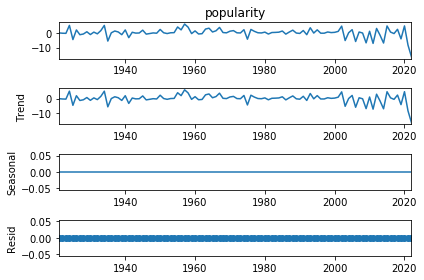

In [117]:
data.index=pd.date_range(freq="y",start='1/1/1920',periods=len(data.index))
result = seasonal_decompose((data["popularity"]), model='additive')
result.plot()
plt.savefig('polulatity seasonal.png')

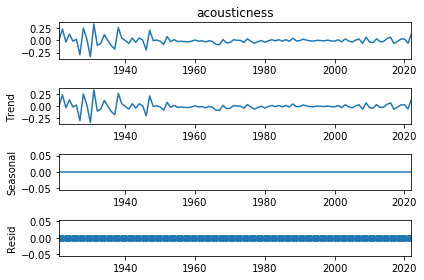

In [118]:
data.index=pd.date_range(freq="y",start='1/1/1920',periods=len(data.index))
result = seasonal_decompose((data["acousticness"]), model='additive')
result.plot()
plt.savefig('acousticness seasonal.png')

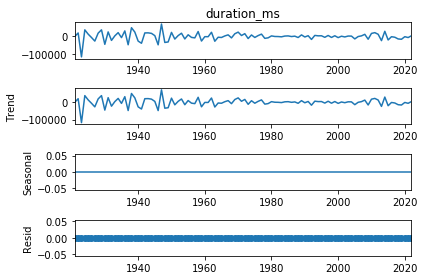

In [119]:
data.index=pd.date_range(freq="y",start='1/1/1920',periods=len(data.index))
result = seasonal_decompose((data["duration_ms"]), model='additive')
result.plot()
plt.savefig('duration_ms seasonal.png')

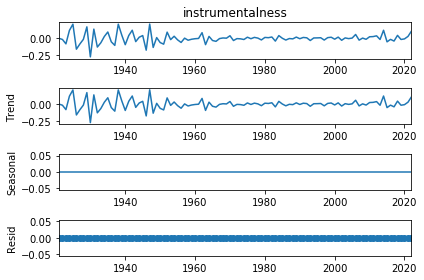

In [120]:
data.index=pd.date_range(freq="y",start='1/1/1920',periods=len(data.index))
result = seasonal_decompose((data["instrumentalness"]), model='additive')
result.plot()
plt.savefig('instrumentalness seasonal.png')

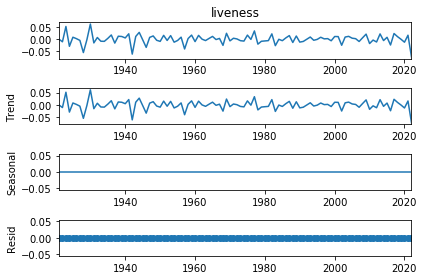

In [121]:
data.index=pd.date_range(freq="y",start='1/1/1920',periods=len(data.index))
result = seasonal_decompose((data["liveness"]), model='additive')
result.plot()
plt.savefig('liveness seasonal.png')

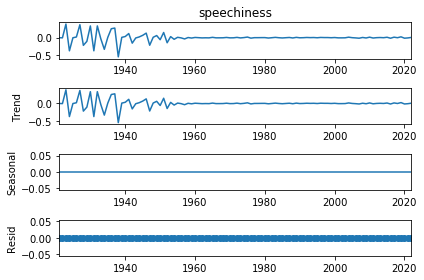

In [122]:
data.index=pd.date_range(freq="y",start='1/1/1920',periods=len(data.index))
result = seasonal_decompose((data["speechiness"]), model='additive')
result.plot()
plt.savefig('speechiness seasonal.png')

In [123]:
from statsmodels.graphics.tsaplots import plot_acf

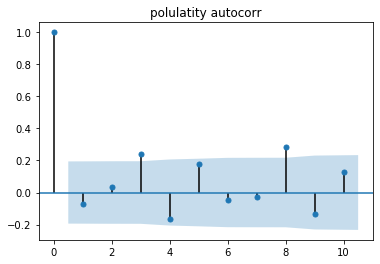

In [124]:
plot_acf(data["popularity"], title="polularity autocorr", lags = 10)
plt.savefig('popularity autocorr')

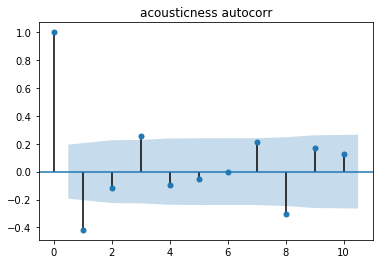

In [125]:
plot_acf(data["acousticness"], title="acousticness autocorr", lags = 10)
plt.savefig('acousticness autocorr')

In [126]:
from statsmodels.tsa.stattools import ccf
def cross_correlation(xs, ys):
    n = min(len(xs), len(ys))
    xs, ys = xs[:n], ys[:n]
    forwards = ccf(xs, ys, False)
    backwards = ccf(ys, xs, False)[::-1]
    n = len(xs)
    lags = list(range(-n + 1, 0)) + list(range(n))
    return np.hstack([backwards[:-1], forwards]), lags

In [127]:
targets = [(data['popularity'], 'popularity'),
           (data['acousticness'], "acousticness")]
predictors = [(data['speechiness'], 'speechiness'),
              (data["liveness"], "liveness"),
              (data["instrumentalness"], "instrumentalness"),
              (data["duration_ms"], "duration_ms")]

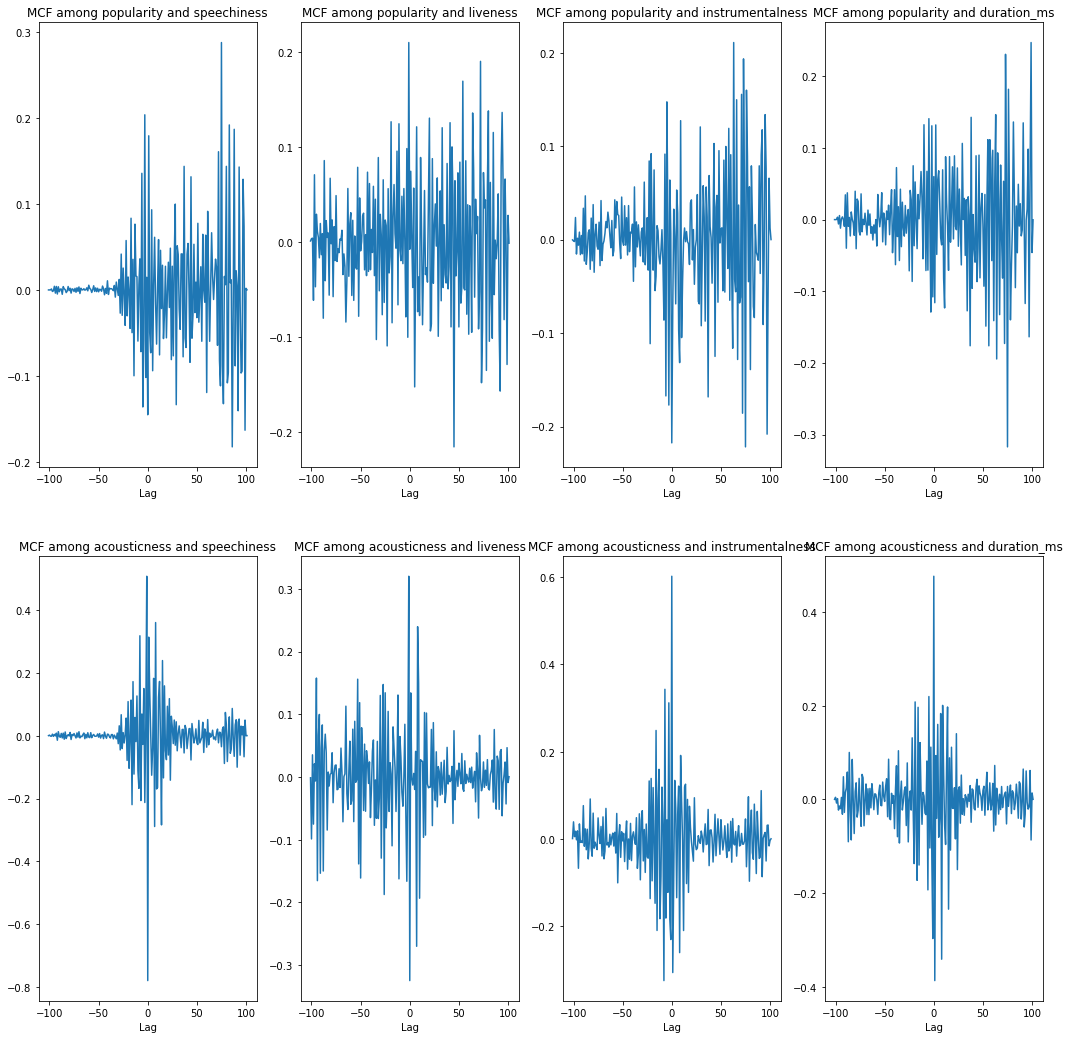

In [128]:
import numpy as np
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 18))
for i, (target, target_str) in enumerate(targets):
    for j, (predictor, predictor_str) in enumerate(predictors):
        cross_corr, lags = cross_correlation(target, predictor)
        axes[i, j].set_title('MCF among ' + f"{target_str} {'and'} {predictor_str}")
        axes[i, j].plot(lags, cross_corr)
        axes[i, j].set_xlabel("Lag")
plt.savefig('MCF.png')

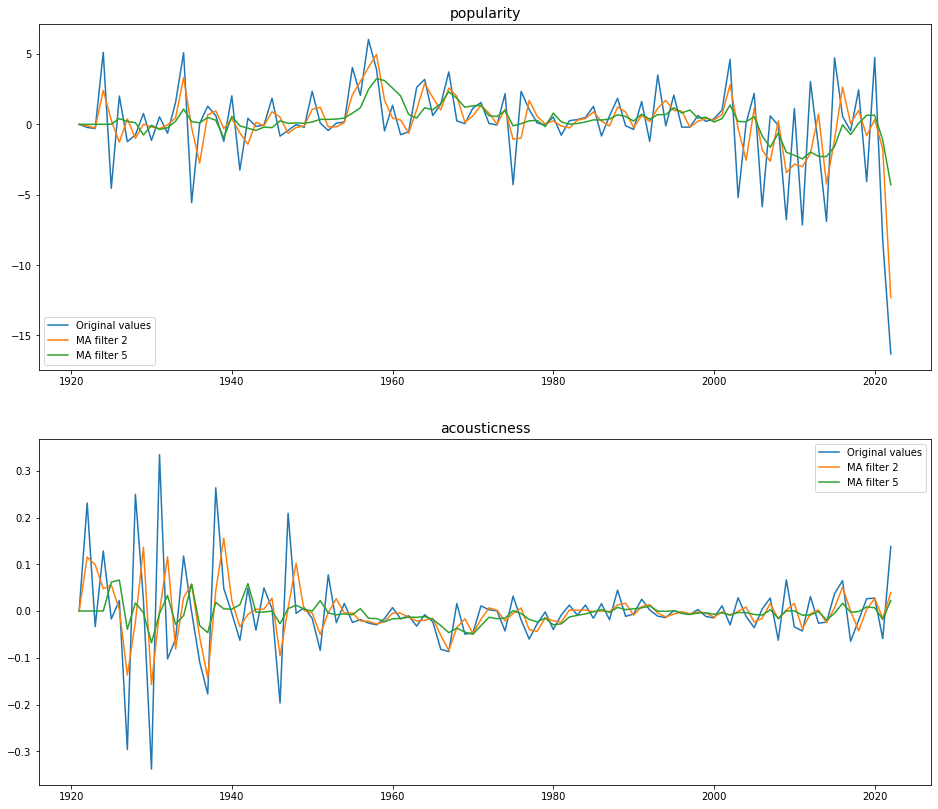

In [129]:
from scipy.ndimage import gaussian_filter1d

def moving_average(xs, window_size):
    return pd.Series(xs).rolling(window_size).mean()

fig, axes = plt.subplots(nrows=2, figsize=(16, 14))
for i, (target, target_str) in enumerate(targets):
    axes[i].set_title(target_str, size=14)
    axes[i].plot(target)
    axes[i].plot(moving_average(target, 2).fillna(0))
    axes[i].plot(moving_average(target, 5).fillna(0))
    axes[i].legend(["Original values", "MA filter 2", "MA filter 5"])
plt.savefig('MAfilter.png')

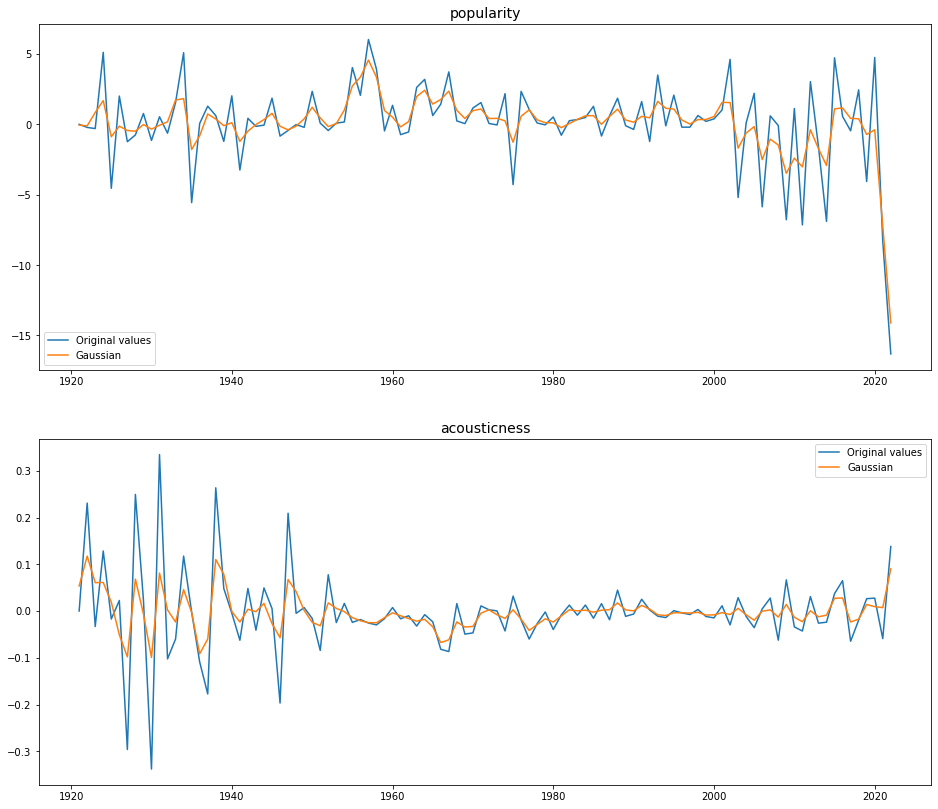

In [130]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 14))
for i, (target, target_str) in enumerate(targets):
    axes[i].set_title(target_str, size=14)
    axes[i].plot(target)
    
    axes[i].plot(target.index, gaussian_filter1d(target, 0.75))
    axes[i].legend(["Original values", "Gaussian"])
plt.savefig('Gaussianfillter')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!
  """
C:\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 256 is greater than input length  = 102, using nperseg = 102
  .format(nperseg, input_length))
C:\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 256 is greater than input length  = 102, using nperseg = 102
  .format(nperseg, input_length))


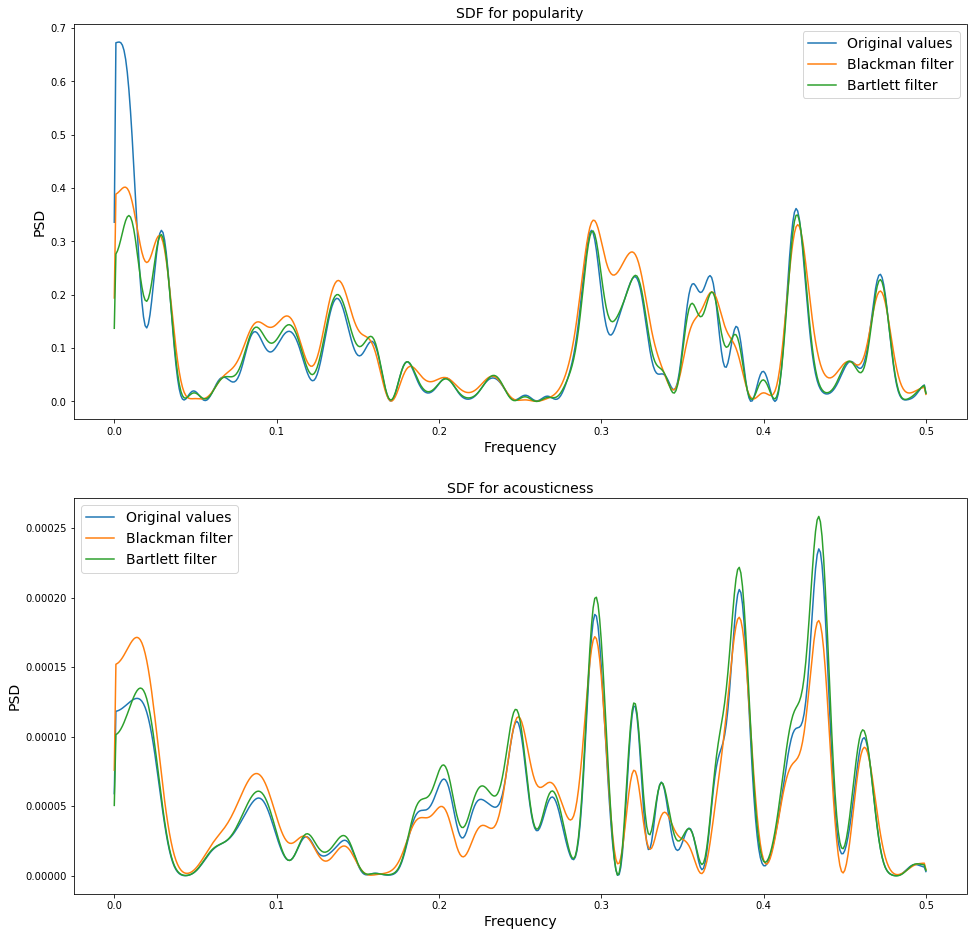

In [131]:
from scipy import signal

window_size = 100
blackman = signal.blackman(M=window_size)
bartlett = signal.hanning(M=window_size)

fig, axes = plt.subplots(nrows=2, figsize=(16, 16))
for i, (target, target_str) in enumerate(targets):
    axes[i].set_title(f"SDF for {target_str}", size=14)
    axes[i].plot(*signal.welch(target, scaling="spectrum", nfft=1000))
    axes[i].plot(*signal.welch(target, fs=1, window = blackman, scaling="spectrum", nfft=1000))
    axes[i].plot(*signal.welch(target, fs=1, window = bartlett, scaling="spectrum", nfft=1000))
    axes[i].set_xlabel("Frequency", size=14)
    axes[i].set_ylabel("PSD", size=14)
    axes[i].legend(["Original values", "Blackman filter", 'Bartlett filter'], prop={"size": 14})
plt.savefig('SDF')

In [132]:
from statsmodels.tsa.ar_model import AutoReg
X_data = data[['duration_ms', 'instrumentalness', 'liveness', 'speechiness']]
Y_data = data[['popularity', 'acousticness']]

In [133]:
import seaborn as sns
Y_data.index= range(len(Y_data.index))
model = AutoReg(np.array(Y_data['popularity'][:80]), lags=2)
model_fit = model.fit()
predict = model_fit.predict(start = 80, end = 98)
print(predict)
model_fit.summary()

[0.59161587 0.55985237 0.57801851 0.57254026 0.57468053 0.5739364
 0.57420851 0.5741112  0.57414634 0.5741337  0.57413826 0.57413662
 0.57413721 0.574137   0.57413707 0.57413704 0.57413705 0.57413705
 0.57413705]


C:\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                     AutoReg(2)   Log Likelihood                -159.712
Method:               Conditional MLE   S.D. of innovations              1.875
Date:                Wed, 21 Apr 2021   AIC                              1.360
Time:                        14:46:59   BIC                              1.481
Sample:                             2   HQIC                             1.408
                                   80                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6576      0.234      2.805      0.005       0.198       1.117
y.L1          -0.2022      0.113     -1.791      0.073      -0.423       0.019
y.L2           0.0569      0.113      0.504      0.614      -0.164       0.278
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7773           +0.0000j            2.7773            0.5000
AR.2            6.3330           +0.0000j            6.3330            0.0000
-----------------------------------------------------------------------------
"""

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-8.39784082729285e-17,
 1.8750722656341836,
 ShapiroResult(statistic=0.9369837045669556, pvalue=0.0007917979382909834))

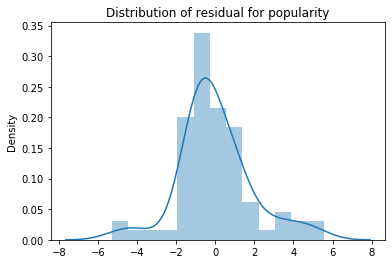

In [135]:
from scipy.stats import shapiro
residuals = model_fit.resid
sns.distplot(residuals, kde=True, norm_hist=True)
plt.title('Distribution of residual for popularity')
plt.savefig('dist_err_popularity')
residuals.mean(), residuals.std(), shapiro(residuals)

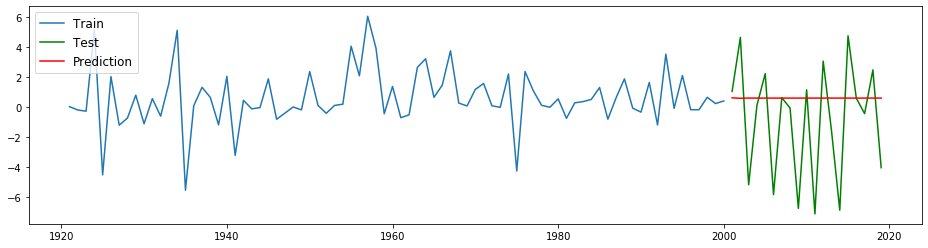

In [136]:
xs = list(range(100))
plt.figure(figsize=(16, 4))
plt.plot(X_data.index[:80], Y_data['popularity'][:80])
plt.plot(X_data.index[80:99], Y_data['popularity'][80:99], color = 'green')
plt.plot(X_data.index[80:99], predict, color="red")
plt.legend(["Train", "Test", "Prediction"], prop={"size": 12})
plt.savefig('dist_prediction_1')

In [137]:
model = AutoReg(np.array(Y_data['acousticness'][:80]), lags=2)
model_fit = model.fit()
predict = model_fit.predict(start = 80, end = 98)
model_fit.summary()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                     AutoReg(2)   Log Likelihood                  88.522
Method:               Conditional MLE   S.D. of innovations              0.078
Date:                Wed, 21 Apr 2021   AIC                             -5.005
Time:                        14:49:22   BIC                             -4.884
Sample:                             2   HQIC                            -4.957
                                   80                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0113      0.009     -1.274      0.203      -0.029       0.006
y.L1          -0.5714      0.100     -5.715      0.000      -0.767      -0.375
y.L2          -0.3557      0.100     -3.558      0.000      -0.552      -0.160
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.8031           -1.4718j            1.6766           -0.3295
AR.2           -0.8031           +1.4718j            1.6766            0.3295
-----------------------------------------------------------------------------
"""

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-2.0683241444338854e-18,
 0.07778239484359871,
 ShapiroResult(statistic=0.9126152992248535, pvalue=5.348323975340463e-05))

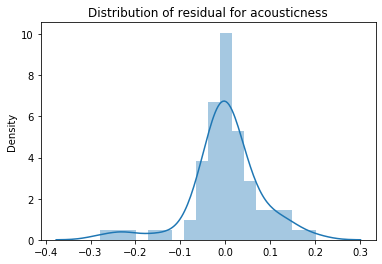

In [138]:
residuals = model_fit.resid
sns.distplot(residuals, kde=True, norm_hist=True)
plt.title('Distribution of residual for acousticness')
plt.savefig('dist_err_acousticness')
residuals.mean(), residuals.std(), shapiro(residuals)

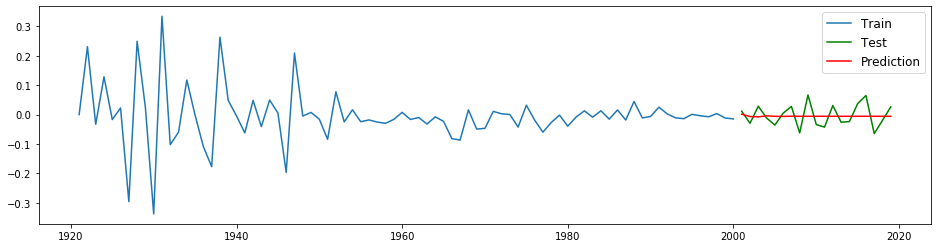

In [139]:
xs = list(range(100))
plt.figure(figsize=(16, 4))
plt.plot(X_data.index[:80], Y_data['acousticness'][:80])
plt.plot(X_data.index[80:99], Y_data['acousticness'][80:99], color = 'green')
plt.plot(X_data.index[80:99], predict, color="red")
plt.legend(["Train", "Test", "Prediction"], prop={"size": 12})
plt.savefig('dist_prediction_2')

In [140]:
import seaborn as sns
Y_data.index= range(len(Y_data.index))
model = AutoReg(np.array(moving_average(Y_data['popularity'], 2).fillna(0))[:80], lags=2)
model_fit = model.fit()
predict = model_fit.predict(start = 80, end = 98)
print(predict)
model_fit.summary()

[0.46039614 0.55882494 0.58269031 0.57963104 0.57453833 0.57249331
 0.57225307 0.57244236 0.57257158 0.57260668 0.57260452 0.57259818
 0.57259539 0.57259497 0.57259518 0.57259535 0.5725954  0.5725954
 0.57259539]


C:\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                   80
Model:                     AutoReg(2)   Log Likelihood                -116.484
Method:               Conditional MLE   S.D. of innovations              1.077
Date:                Wed, 21 Apr 2021   AIC                              0.251
Time:                        14:49:56   BIC                              0.372
Sample:                             2   HQIC                             0.300
                                   80                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3770      0.139      2.707      0.007       0.104       0.650
y.L1           0.4919      0.112      4.398      0.000       0.273       0.711
y.L2          -0.1503      0.112     -1.346      0.178      -0.369       0.069
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6358           -1.9939j            2.5791           -0.1406
AR.2            1.6358           +1.9939j            2.5791            0.1406
-----------------------------------------------------------------------------
"""

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(2.1635115351669717e-16,
 1.077284129809531,
 ShapiroResult(statistic=0.9692937135696411, pvalue=0.056379422545433044))

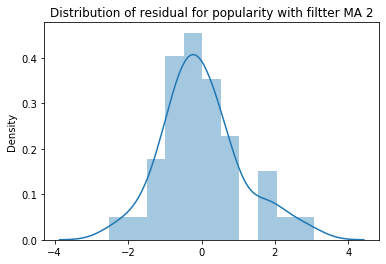

In [141]:
residuals = model_fit.resid
sns.distplot(residuals, kde=True, norm_hist=True)
plt.title('Distribution of residual for popularity with filtter MA 2')
plt.savefig('dist_err_popularity_2')
residuals.mean(), residuals.std(), shapiro(residuals)

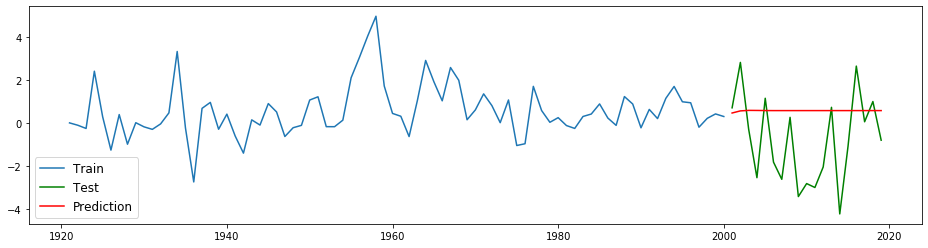

In [142]:
xs = list(range(100))
plt.figure(figsize=(16, 4))
plt.plot(X_data.index[:80], moving_average(Y_data['popularity'], 2).fillna(0)[:80])
plt.plot(X_data.index[80:99], moving_average(Y_data['popularity'], 2).fillna(0)[80:99], color = 'green')
plt.plot(X_data.index[80:99], predict, color="red")
plt.legend(["Train", "Test", "Prediction"], prop={"size": 12})
plt.savefig('dist_prediction_3')

In [143]:
from statsmodels.tsa.vector_ar.var_model import VAR
Y_data.index = X_data.index
model = VAR(Y_data[:80], X_data[:80])
model_fit = model.fit()
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 21, Apr, 2021
Time:                     14:51:30
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -4.16741
Nobs:                     79.0000    HQIC:                  -4.41909
Log likelihood:          -28.9934    FPE:                  0.0101897
AIC:                     -4.58731    Det(Omega_mle):      0.00859840
--------------------------------------------------------------------
Results for equation popularity
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.582447         0.200703            2.902           0.004
duration_ms              0.000014         0.000011            1.276           0.202
instrumentalness       -13.627589         3

In [144]:
predict = model_fit.forecast(model_fit.y, 19, exog_future=X_data.iloc[80:99, :])[:,0]

C:\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


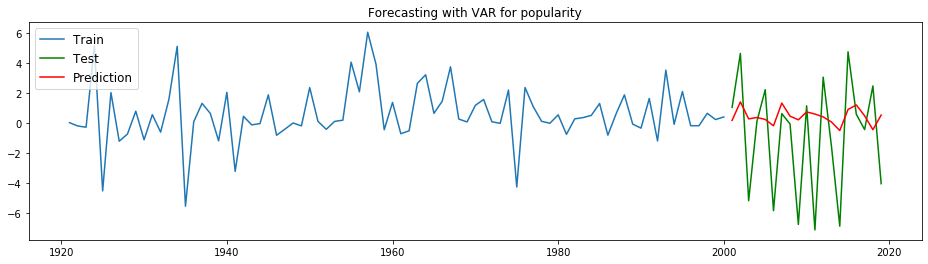

In [146]:
xs = list(range(100))
plt.figure(figsize=(16, 4))
plt.plot(X_data.index[:80], Y_data['popularity'][:80])
plt.plot(X_data.index[80:99], Y_data['popularity'][80:99], color = 'green')
plt.plot(X_data.index[80:99], predict, color="red")
plt.legend(["Train", "Test", "Prediction"], prop={"size": 12})
plt.title('Forecasting with VAR for popularity')
plt.savefig('dist_prediction_VAR')

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(2.2053385840418062e-14,
 1.6292320333311656,
 ShapiroResult(statistic=0.964396595954895, pvalue=0.0265626460313797))

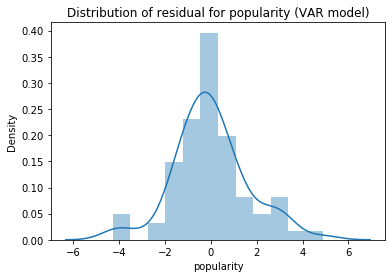

In [147]:
residuals = model_fit.resid.iloc[:, 0]
sns.distplot(residuals, kde=True, norm_hist=True)
plt.title('Distribution of residual for popularity (VAR model)')
plt.savefig('dist_err_popularity_VAR')
residuals.mean(), residuals.std(), shapiro(residuals)

C:\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


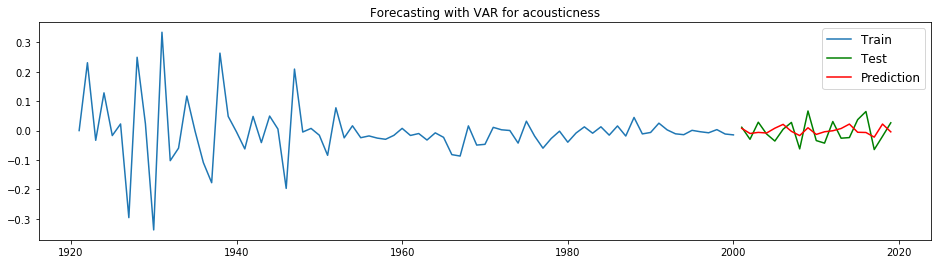

In [149]:
predict = model_fit.forecast(model_fit.y, 19, exog_future=X_data.iloc[80:99, :])[:,1]
xs = list(range(100))
plt.figure(figsize=(16, 4))
plt.plot(X_data.index[:80], Y_data['acousticness'][:80])
plt.plot(X_data.index[80:99], Y_data['acousticness'][80:99], color = 'green')
plt.plot(X_data.index[80:99], predict, color="red")
plt.legend(["Train", "Test", "Prediction"], prop={"size": 12})
plt.title('Forecasting with VAR for acousticness')
plt.savefig('dist_prediction_VAR_acc')

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(4.1705826555984176e-15,
 0.053452133688747516,
 ShapiroResult(statistic=0.9029116034507751, pvalue=1.8105451090377755e-05))

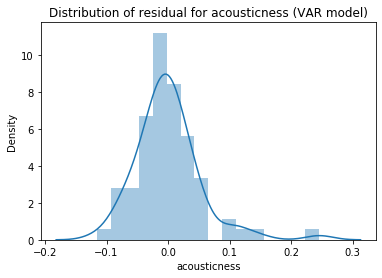

In [151]:
residuals = model_fit.resid.iloc[:, 1]
sns.distplot(residuals, kde=True, norm_hist=True)
plt.title('Distribution of residual for acousticness (VAR model)')
plt.savefig('dist_err_acousticness_VAR')
residuals.mean(), residuals.std(), shapiro(residuals)